# Removing the metadata from the image

This notebook shows how the bar with the metadata at the bottom of the SEM images is removed.

In [1]:
from carde.image_processing import preprocess_images
from skimage.io import imread
import SimpleITK as sitk
import stackview
import numpy as np
import carde

In [2]:
image = imread(carde.io.local_data_path / '01-02/Original SEM Images/WD_06mm_001.tif')

In [3]:
image = imread(carde.io.local_data_path / "21-22/Original SEM Images/WD6mm_21.tif")

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
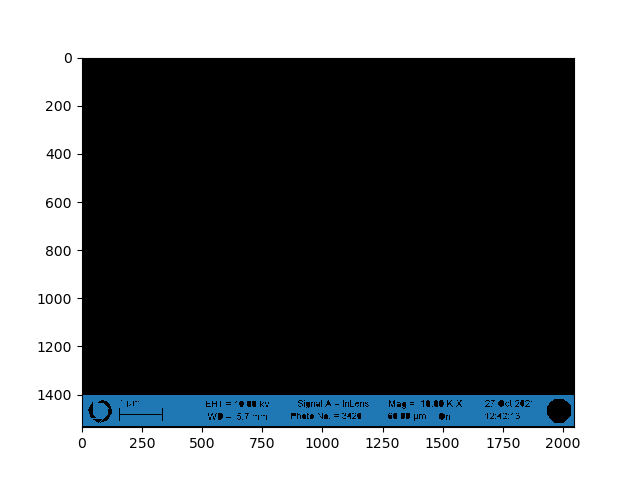

In [4]:
mask = sitk.OtsuThreshold(sitk.GetImageFromArray(image), 0, 1)
mask = sitk.ConnectedComponent(mask)
mask = sitk.RelabelComponent(mask, minimumObjectSize=10*image.shape[1])

stackview.insight(sitk.GetArrayViewFromImage(mask))

In [5]:
label_stats = sitk.LabelShapeStatisticsImageFilter()
label_stats.Execute(mask)

largest_label = 0
largest_label_size = 0
for label in label_stats.GetLabels():
    if label_stats.GetNumberOfPixels(label) > largest_label_size:
        largest_label = label
        largest_label_size = label_stats.GetNumberOfPixels(label)
largest_label

1

In [6]:
label_stats.GetNumberOfPixels(largest_label)

228711

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
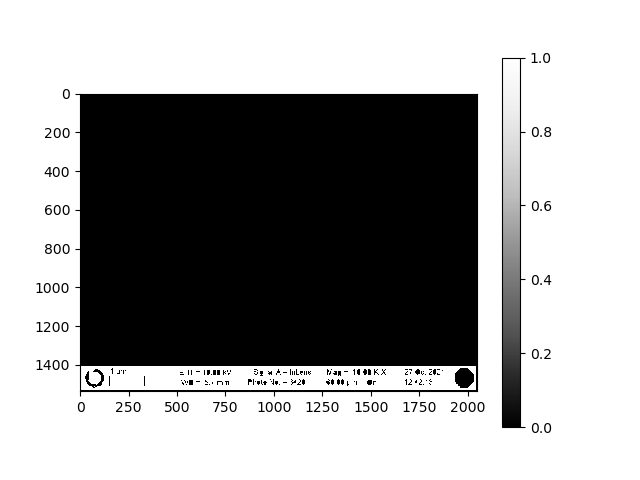
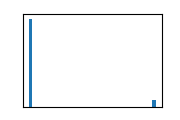

In [7]:
mask = sitk.BinaryThreshold(mask, largest_label, largest_label, 1, 0)

stackview.insight(sitk.GetArrayViewFromImage(mask))

In [8]:
mask = sitk.GetArrayFromImage(mask)
last_line = min(np.where(mask)[0]) - 1
last_line

1404

In [9]:
preprocess_images()

Preprocessed WD_06mm_008.tif
Preprocessed WD_06mm_007.tif
Preprocessed WD6mm_26.tif
Preprocessed WD6mm_25.tif
Preprocessed WD_06mm_016.tif
Preprocessed WD_06mm_015.tif
Preprocessed WD6mm_48.tif
Preprocessed WD6mm_47.tif
Preprocessed WD_06mm_002.tif
Preprocessed WD_06mm_001.tif
Preprocessed WD_06mm_014.tif
Preprocessed WD_06mm_013.tif
Preprocessed WD6mm_23.tif
Preprocessed WD6mm_24.tif
Preprocessed WD_06mm_003.tif
Preprocessed WD_06mm_004.tif
Preprocessed WD_06mm_011.tif
Preprocessed WD_06mm_012.tif
Preprocessed WD6mm_21.tif
Preprocessed WD6mm_22.tif
Preprocessed WD_06mm_009.tif
Preprocessed WD_06mm_010.tif
Preprocessed WD_06mm_005.tif
Preprocessed WD_06mm_006.tif
Preprocessed WD6mm_28.tif
Preprocessed WD6mm_27.tif
